# 1.Module Import

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from flask import Flask, request, render_template,flash
import numpy as np
import os

# 2.Tải dữ liệu

In [4]:
# Tải dữ liệu
data = pd.read_csv('california_housing_4decimals.csv')
X = data.drop(columns=['Gia nha'])
y = data['Gia nha']
print(data.head().to_string())
print(data.tail().to_string())


   Thu nhap trung binh  Tuoi nha  So luong phong  So phong ngu  Dan so  So luong nguoi song  Vi do  Kinh do  Gia nha
0               8.3252        41          6.9841        1.0238     322               2.5556  37.88  -122.23    4.526
1               8.3014        21          6.2381        0.9719    2401               2.1098  37.86  -122.22    3.585
2               7.2574        52          8.2881        1.0734     496               2.8023  37.85  -122.24    3.521
3               5.6431        52          5.8174        1.0731     558               2.5479  37.85  -122.25    3.413
4               3.8462        52          6.2819        1.0811     565               2.1815  37.85  -122.25    3.422
       Thu nhap trung binh  Tuoi nha  So luong phong  So phong ngu  Dan so  So luong nguoi song  Vi do  Kinh do  Gia nha
20635               1.5603        25          5.0455        1.1333     845               2.5606  39.48  -121.09    0.781
20636               2.5568        18          6.1140    

# 3.Phân tích các tham số ảnh hưởng tới mô hình

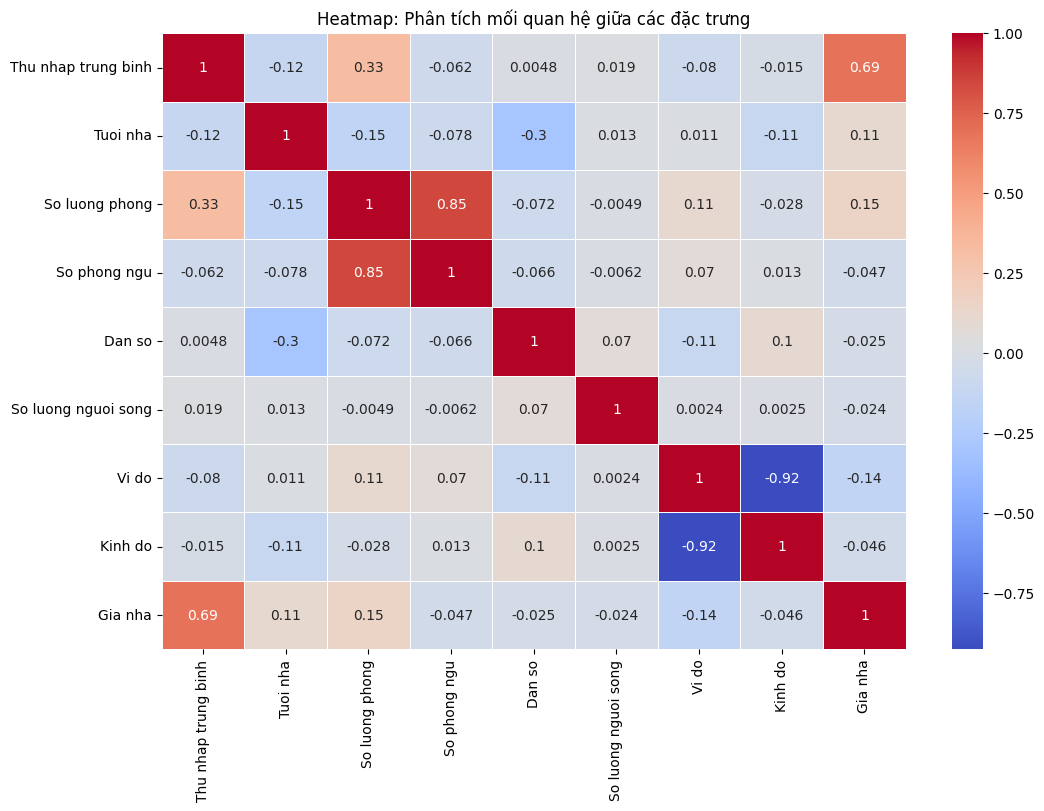

In [5]:
# Tính toán hệ số tương quan giữa các đặc trưng và giá trị mục tiêu
correlation_matrix = data.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap: Phân tích mối quan hệ giữa các đặc trưng")
plt.show()

# 4.Chia tập dữ liệu và chuẩn hóa

In [6]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Chuẩn hóa dữ liệu
scaler = StandardScaler() #Bộ chuẩn hóa sẽ tính giá trị trung bình và độ lệch chuẩn
X_train = scaler.fit_transform(X_train) #Tính giá trị trung bình và độ lệch chuẩn cho dữ liệu huấn luyện và chuẩn hóa nó.
X_test = scaler.transform(X_test) #Chuẩn hóa dữ liệu kiểm tra dựa trên thông tin từ tập huấn luyện.


# 5.Mô hình hồi quy tuyến tính

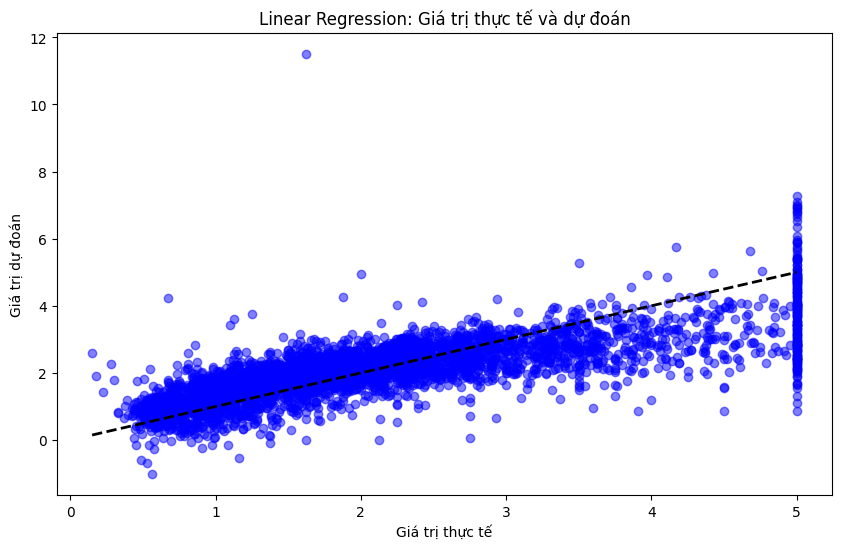

Linear Regression:
MSE: 0.55589
RMSE: 0.74558
R²: 0.57579



In [7]:
# Huấn luyện mô hình hồi quy tuyến tính
linear_model = LinearRegression() #Khởi tạo mô hình hồi quy tuyến tính
linear_model.fit(X_train, y_train) #Huấn luyện mô hình để tìm mối quan hệ giữa các đặc trưng đầu vào (X_train) và giá trị mục tiêu (y_train)

# Dự đoán
y_pred_linear = linear_model.predict(X_test)

# Biểu đồ mô hình
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Linear Regression: Giá trị thực tế và dự đoán")
plt.show()

# Đánh giá mô hình
mse_linear = mean_squared_error(y_test, y_pred_linear) #đo lường sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế
rmse_linear = mse_linear ** 0.5 #thể hiện sai số với cùng đơn vị như biến mục tiêu
r2_linear = r2_score(y_test, y_pred_linear) #đánh giá mức độ mà mô hình giải thích được phương sai của biến mục tiêu, càng gần 1 càng tốt
print("Linear Regression:")
print(f"MSE: {mse_linear:.5f}")
print(f"RMSE: {rmse_linear:.5f}")
print(f"R²: {r2_linear:.5f}\n")

# 6.Test tham số truyền vào mô hình Ridge

In [8]:
# Tối ưu hóa mô hình Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

print("Ridge best parameters:", ridge_grid_search.best_params_)
print("Ridge best cross-validation score:", -ridge_grid_search.best_score_)

Ridge best parameters: {'alpha': 0.1}
Ridge best cross-validation score: 0.5192644002307437


# 7.Mô hình hồi quy Ridge

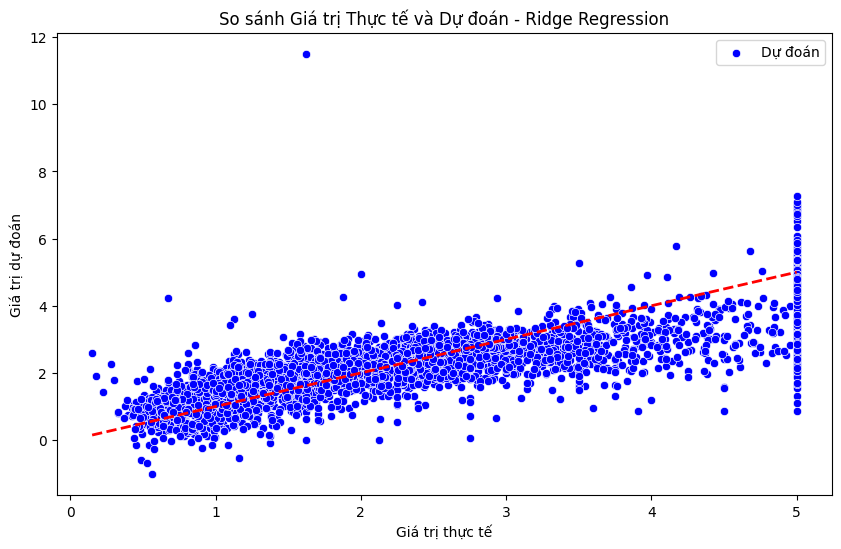

Ridge Regression:
MSE: 0.55585
RMSE: 0.74556
R²: 0.57582



In [32]:
# Huấn luyện mô hình Ridge
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

# Dự đoán
y_pred_ridge = ridge_model.predict(X_test)

# Biểu đồ cho mô hình
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color="blue", label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh Giá trị Thực tế và Dự đoán - Ridge Regression")
plt.legend()
plt.show()

# Đánh giá mô hình
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression:")
print(f"MSE: {mse_ridge:.5f}")
print(f"RMSE: {rmse_ridge:.5f}")
print(f"R²: {r2_ridge:.5f}\n")

# 8.Test tham số truyền vào Neural Network

In [9]:
# Tối ưu hóa MLPRegressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
mlp_grid_search = GridSearchCV(MLPRegressor(max_iter=500, random_state=42), mlp_params, cv=5, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train, y_train)
best_mlp_model = mlp_grid_search.best_estimator_

print("MLPRegressor best parameters:", mlp_grid_search.best_params_)
print("MLPRegressor best cross-validation score:", -mlp_grid_search.best_score_)

MLPRegressor best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MLPRegressor best cross-validation score: 0.29932670572927905


# 9.Mô hình Neural Netwwork

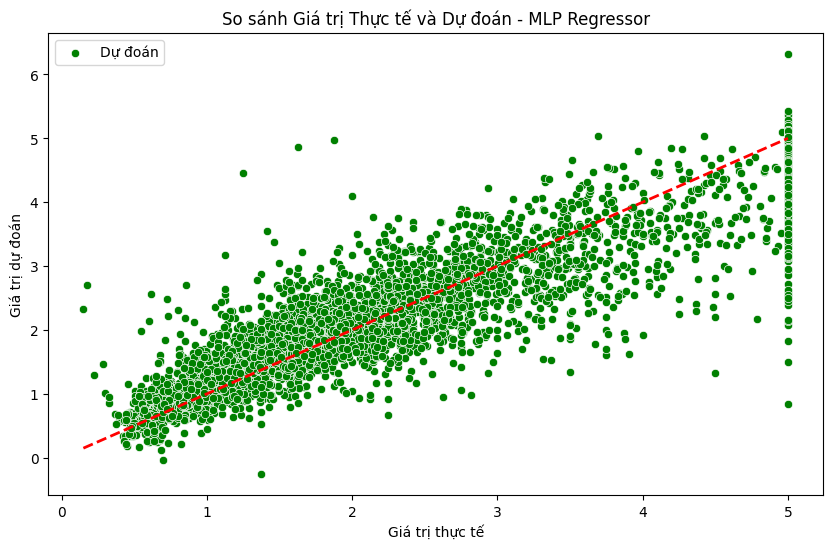

MLP Regressor (Neural Network):
MSE: 0.30122
RMSE: 0.54883
R²: 0.77014



In [33]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Dự đoán
y_pred_mlp = mlp_model.predict(X_test)

# Biểu đồ mô hình MLP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlp, color="green", label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh Giá trị Thực tế và Dự đoán - MLP Regressor")
plt.legend()
plt.show()

# Đánh giá mô hình
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mse_mlp ** 0.5
r2_mlp = r2_score(y_test, y_pred_mlp)
print("MLP Regressor (Neural Network):")
print(f"MSE: {mse_mlp:.5f}")
print(f"RMSE: {rmse_mlp:.5f}")
print(f"R²: {r2_mlp:.5f}\n")

# 10.Mô hình kết hợp Stacking

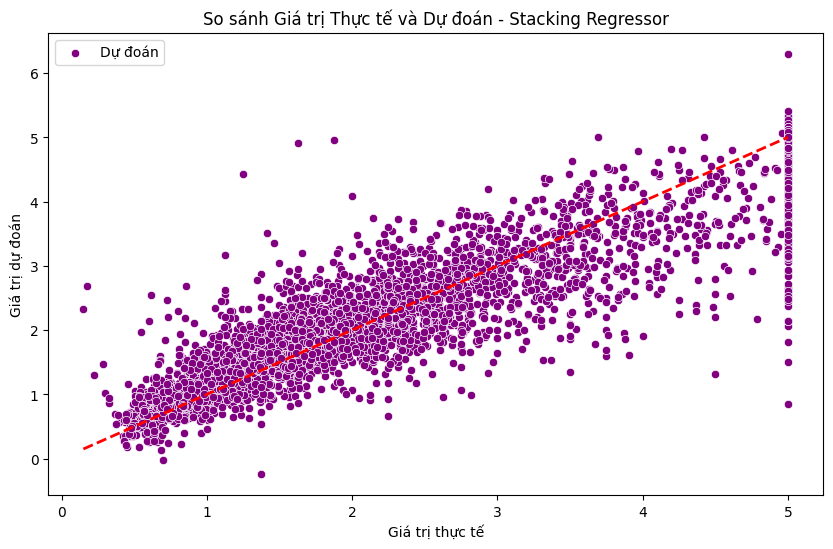

Stacking Regressor:
MSE: 0.30152
RMSE: 0.54911
R²: 0.76990



In [34]:
estimators = [
    ('linear', LinearRegression()), # hồi quy tuyến tính
    ('ridge', Ridge(alpha=1.0)),    # hồi quy ridge
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)) # mạng nơ-ron
]

# Mô hình meta
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Huấn luyện mô hình stacking
stacking_model.fit(X_train, y_train)

# Dự đoán
y_pred_stacking = stacking_model.predict(X_test)

# Biểu đồ mô hình
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking, color="purple", label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh Giá trị Thực tế và Dự đoán - Stacking Regressor")
plt.legend()
plt.show()

# Đánh giá mô hình
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = mse_stacking ** 0.5
r2_stacking = r2_score(y_test, y_pred_stacking)
print("Stacking Regressor:")
print(f"MSE: {mse_stacking:.5f}")
print(f"RMSE: {rmse_stacking:.5f}")
print(f"R²: {r2_stacking:.5f}\n")

# 11.Kết quả của 4 mô hình

In [42]:
results = {
    "Linear Regression": {"MSE": mse_linear, "RMSE": rmse_linear, "R²": r2_linear},
    "Ridge Regression": {"MSE": mse_ridge, "RMSE": rmse_ridge, "R²": r2_ridge},
    "MLP Regressor": {f"MSE": mse_mlp, "RMSE": rmse_mlp, "R²": r2_mlp},
    "Stacking Regressor": {f"MSE": mse_stacking, "RMSE": rmse_stacking, "R²": r2_stacking},
}
for model, metrics in results.items():
    print(f"{model}: MSE: {metrics['MSE']:.5f}, RMSE: {metrics['RMSE']:.5f}, R²: {metrics['R²']:.5f}")

Linear Regression: MSE: 0.55589, RMSE: 0.74558, R²: 0.57579
Ridge Regression: MSE: 0.55585, RMSE: 0.74556, R²: 0.57582
MLP Regressor: MSE: 0.30122, RMSE: 0.54883, R²: 0.77014
Stacking Regressor: MSE: 0.30152, RMSE: 0.54911, R²: 0.76990
